In [ ]:
![](https://www.logisticsbureau.com/blog/wp-content/uploads/2012/05/Blog_What-is-Inventory.png)

<center> <h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Inventory Analysis Case Study</h1></center>

 <h1 style="color:red;font-weight:bold; border-bottom: 5px solid red; font-family:Times New Roman;" >Project Overview</h1>

<p style="font-family:Times New Roman; font-size:20px;" >PwC has built this case study to be used in university classrooms to enhance students’ understanding and knowledge of data analytics, including leveraging analytics to make business decisions
By completing this case study, students will obtain the following-</p>
<pre style="font-family:Times New Roman; font-size:20px;">
* An understanding of what data analytics and visualization are
* The ability to utilize analytic tools 
* Comfort in leveraging data in making decisions 
* Skills to select data components for analysis and illustrate results to highlight data tracking and identify conditions for exception analysis or business advisory strategy</pre>

 <h1 style="color:red;font-weight:bold; border-bottom: 5px solid red; font-family:Times New Roman;" >Recommended Audience</h1>

<p style="font-family:Times New Roman; font-size:20px;" >It is recommended that this project be introduced to students who have successfully completed Intermediate Accounting.  It could be easily embedded into an Accounting Information Systems (AIS or CIS) course, a Data Analytics course or an Advanced Audit course.
It is recommended that the students work in small groups of 2-3 to complete the pre-work, in-class activities, and case study questions.  You can have larger groups but that will reduce the level of hands-on engagement by all group members.</p>

<h1 style="color:red;font-weight:bold; border-bottom: 5px solid red; font-family:Times New Roman;" >Case Background</h1>

<p style="font-family:Times New Roman; font-size:20px;" > Our case is based upon Bibitor, LLC*note1, a liquor store chain in the fictional state of Lincoln. It is a major retailer with approximately 80 locations and total sales in excess of $450 million.
Bibitor has asked the team to complete due diligence on their wine and spirits business looking at data for their beginning and ending inventory, purchases and sales for a 12 month period</p>

<h1 style="color:red;font-weight:bold; border-bottom: 5px solid red; font-family:Times New Roman;" >Case Format and Learning Objectives:</h1>

<p style="font-family:Times New Roman; font-size:20px;" >This case is designed to be delivered in three phases.  Each phase includes an instructional component to learn how to manage the data within the tool and then there are case study exercises designed to apply the skills addressed.</p>

![](https://www.netsuite.com/portal/assets/img/business-articles/inventory-management/social-days-in-inventory.jpg)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data collection

<center> <h1 style="background-color:black; color:white; font-weight:bold; font-family:Times New Roman;" >Data collection</h1></center>

In [3]:
purches = pd.read_csv('../data/InventoryAnalysisCaseStudy/InvoicePurchases12312016.csv')
InvFinal = pd.read_csv('../data/InventoryAnalysisCaseStudy/EndInvFINAL12312016.csv')
sales = pd.read_csv('../data/InventoryAnalysisCaseStudy/SalesFINAL12312016.csv')
BegInv = pd.read_csv('../data/InventoryAnalysisCaseStudy/BegInvFINAL12312016.csv')
PurchasePrice = pd.read_csv('../data/InventoryAnalysisCaseStudy/2017PurchasePricesDec.csv')
PurchasesFinal = pd.read_csv('../data/InventoryAnalysisCaseStudy/PurchasesFINAL12312016.csv')
purches.head(5)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [10]:
InvFinal.head(5)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [11]:
sales.head(5)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [12]:
BegInv.head(5)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [13]:
PurchasePrice.head(5)

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [14]:
PurchasesFinal.head(5)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [15]:
purches.head(5)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


# Exploratory Data Analysis (EDA)

<center> <h1 style="background-color:black; color:white; font-weight:bold; font-family:Times New Roman; font-size:35px;" >Exploratory Data Analysis (EDA)</h1></center>

<h1 style="color:Blue;font-weight:bold; border-bottom: 5px solid blue; font-family:Times New Roman;" >Invoice Purchases</h1>

In [16]:
purches.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

In [17]:
purches.shape

(5543, 10)

In [18]:
purches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [19]:
purches['InvoiceDate'] = pd.to_datetime(purches['InvoiceDate'])

In [20]:
purches['Total Amount'] = purches['Dollars'] + purches['Freight']

In [21]:
purches.head(2)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,Total Amount
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN,149.12


In [22]:
purches['Approval'].unique()

array([nan, 'Frank Delahunt'], dtype=object)

In [23]:
drop = ['VendorNumber','PONumber','PODate']
purches.drop(drop, axis = 1, inplace =True)

In [24]:
High_purchases_item =purches.loc[purches['Quantity'].idxmax(), 'VendorName']
Quty = purches['Quantity'].max()
print("High Prchuse Vendor Name:- ",High_purchases_item,"Quantity :-", Quty)


High Prchuse Vendor Name:-  DIAGEO NORTH AMERICA INC    Quantity :- 141660


In [25]:
total_num_of_invoice = purches[purches['VendorName'] == 'DIAGEO NORTH AMERICA INC   '].shape[0]
print('Total Number Of Invoice:-',total_num_of_invoice)
Spend_Total_Amount =purches.loc[purches['VendorName'] == 'DIAGEO NORTH AMERICA INC   ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount)

Total Number Of Invoice:- 55
Spend Total Amount:- 51216828.92


In [26]:
Low_purchases_item =purches.loc[purches['Quantity'].idxmin(), 'VendorName']
Quty2 = purches['Quantity'].min()
print("Low Prchuse Vendor Name:- ",Low_purchases_item,"Quantity :-", Quty2)

Low Prchuse Vendor Name:-  HOOD RIVER DISTILLERS, Inc. Quantity :- 1


In [27]:
Spend_Total_Amount =purches.loc[purches['VendorName'] == 'HOOD RIVER DISTILLERS, Inc.','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount)

Spend Total Amount:- 24153.480000000003


<h1 style="color:Blue;font-weight:bold; border-bottom: 5px solid blue; font-family:Times New Roman;" >Sales FINAL</h1>

In [28]:
sales.head(5)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [29]:
drop1 = ['InventoryId','VendorNo','Brand',]
sales.drop(drop1,axis=1,inplace=True)

In [30]:
sales

,Store,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorName
0,1,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
1,1,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,JIM BEAM BRANDS COMPANY
2,1,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
3,1,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
4,1,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...
1048570,19,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2/12/2016,750,2,0.45,SOUTHERN WINE & SPIRITS NE
1048571,19,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2/13/2016,750,2,0.90,SOUTHERN WINE & SPIRITS NE
1048572,19,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2/19/2016,750,2,0.11,SOUTHERN WINE & SPIRITS NE
1048573,19,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2/22/2016,750,2,0.34,SOUTHERN WINE & SPIRITS NE


In [31]:
sales['Total Amount'] = sales['SalesDollars'] + sales['ExciseTax']

In [32]:
High_sales_item =sales.loc[sales['SalesQuantity'].idxmax(), 'VendorName']
Quty3 = sales['SalesQuantity'].max()
print("High sales Vendor Name:- ",High_sales_item,"Quantity :-", Quty3)

High sales Vendor Name:-  E & J GALLO WINERY          Quantity :- 432


In [33]:
total_num_of_invoice3 = sales[sales['VendorName'] == 'E & J GALLO WINERY         '].shape[0]
print('Total Number Of Invoice:-',total_num_of_invoice3)
Spend_Total_Amount3 =sales.loc[sales['VendorName'] == 'E & J GALLO WINERY         ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount3)

Total Number Of Invoice:- 65240
Spend Total Amount:- 1575923.91


In [34]:
Low_sales_item =sales.loc[sales['SalesQuantity'].idxmin(), 'VendorName']
Quty4 = sales['SalesQuantity'].min()
print("Low sales Vendor Name:- ",Low_sales_item,"Quantity :-", Quty4)

Low sales Vendor Name:-  JIM BEAM BRANDS COMPANY     Quantity :- 1


In [35]:
Spend_Total_Amount4 =sales.loc[sales['VendorName'] == 'JIM BEAM BRANDS COMPANY    ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount4)

Spend Total Amount:- 2703876.6599999997


In [36]:
sales['Description'].unique()

array(['Jim Beam w/2 Rocks Glasses', "Maker's Mark Combo Pack",
       'F Coppola Dmd Ivry Cab Svgn', ..., 'Anarkos Puglia',
       'Bols Creme De Noyaux', 'Austin Hope 10 Syrah'], dtype=object)

<AxesSubplot:xlabel='Total Amount', ylabel='Description'>

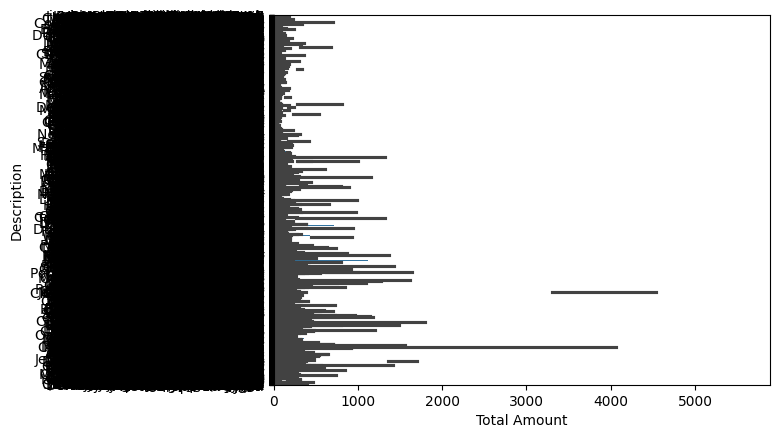

In [37]:
sns.barplot(x='Total Amount', y='Description', data=sales)